In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

ecg = np.loadtxt("/content/ecg.txt")

sample_rate = 1000
time = np.arange(len(ecg)) / sample_rate

undersample_rate = 300
resample_factor = sample_rate / undersample_rate

undersample_amt = int(len(ecg) / resample_factor)
undersampled = signal.resample(ecg, undersample_amt)

max_value = ecg.max()
min_value = ecg.min()
normalized = (undersampled - min_value) / (max_value - min_value)


plt.plot(time[0:1000], normalized[0:1000])
#plt.plot(time[0:3333], ecg[0:3333])
plt.xlabel("Time (sec)")
plt.ylabel("Amplitude")
plt.title("ECG")
plt.show()



FileNotFoundError: ignored

In [ ]:
fft = np.fft.fft(normalized)

size = normalized.size
sample_freq = time[1] - time[0]
print(sample_freq)
frequency = np.linspace(0, 1/sample_freq, size)
plt.bar(frequency[0:int(size/2)], np.abs(fft)[0:int(size/2)] / size, width = 1.5)
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.title("Spectrogram of ECG Signal")
plt.show()

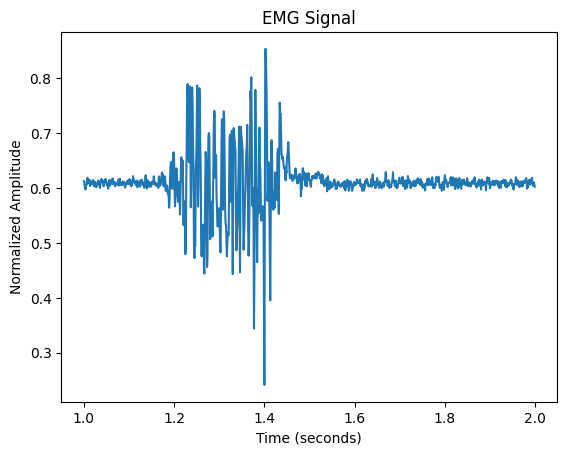

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

emg = np.loadtxt("/content/emg_1.txt")

sample_rate = 1000
time = np.arange(len(emg)) / sample_rate

undersample_rate = 800
resample_factor = sample_rate / undersample_rate

undersample_amt = int(len(emg) / resample_factor)
undersampled = signal.resample(emg, undersample_amt)

max_value = emg.max()
min_value = emg.min()
normalized = (undersampled - min_value) / (max_value - min_value)

plt.plot(time[1000:2000], normalized[1000:2000])
#plt.plot(time[0:10000], normalized[0:10000])
plt.xlabel("Time (seconds)")
plt.ylabel("Normalized Amplitude")
plt.title("EMG Signal")
plt.show()




In [ ]:
import scipy.signal
fft = np.fft.fft(normalized)

size = normalized.size
sample_freq = time[1] - time[0]
frequency = np.linspace(0, 1/sample_freq, size)
#plt.bar(frequency[0:int(size/2)], np.abs(fft)[0:int(size/2)] / size, width = 3)
#plt.bar(frequency[0:size], np.abs(fft)[0:size] / size, width = 1.5)

F1, pxx_den1 = scipy.signal.periodogram(normalized, 800, 'flattop', scaling='spectrum')
plt.plot(F1, pxx_den1)
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.title("Spectrogram of EMG Signal")
plt.show()

In [ ]:
import scipy.signal
b, a = scipy.signal.butter(2, [30, 300], 'bandpass',fs=800)
filteredBandPass = scipy.signal.lfilter(b, a, emg)
plt.plot(emg)
plt.plot(filteredBandPass)
plt.legend(["Original EMG", "Filtered EMG"])
plt.show()

In [ ]:
F1, pxx_den1 = scipy.signal.periodogram(normalized, 800, 'flattop', scaling='spectrum')
F2, pxx_den2 = scipy.signal.periodogram(filteredBandPass, 800, 'flattop', scaling='spectrum')
plt.plot(F2, pxx_den2)
plt.plot(F1, pxx_den1)

plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.title("Spectrogram of EMG Signal")
plt.legend(["Filtered EMG", "Original EMG"])
plt.show()